
# Projeto Final - Predição de Candidatos no Ingresso de Programas de Mestrado

## Alunos

- Antonio Roberto git: https://github.com/AntonioJunior2222 
- Aryelson Gonçalves git: https://github.com/aryelson1 
- Ismael Marinho git: https://github.com/smalljooj

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics
from sklearn import neural_network

## I - Importando os Dados

In [18]:
base_mestrado = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSd1ArmPR4Cuq6zX5JC6ocGIQQ1m3p783mhqwxDyJawj9qB0z_XwweRnv9q5PoWL2MCwnVIgDF5zoiN/pub?gid=1413359654&single=true&output=csv")
df_mod = base_mestrado

## II - Revisando as colunas e como os dados estão distribuidos.

In [19]:
base_mestrado.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
base_mestrado.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [21]:
base_mestrado.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## III - Verificando o relacionamento dos dados usando o HeatMap.

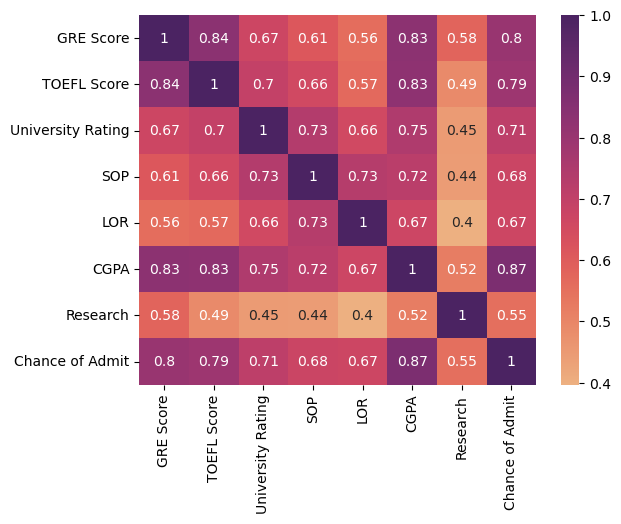

In [22]:
corr = base_mestrado.drop(columns = 'Serial No.').corr()
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True))

In [23]:
df_mod.drop(columns = ['Serial No.'], inplace = True)

In [24]:
df_mod

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### Normalização dos dados para mitigar o grande range de valores das colunas GRE Score e TOEFL Score.

In [25]:
qtd_colunas = len(base_mestrado.columns)
for i in range(2):
    df_mod.iloc[:,i] = MinMaxScaler().fit_transform(np.array(df_mod.iloc[:,i]).reshape(-1,1))
df_mod

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,4,4.5,4.5,9.65,1,0.92
1,0.68,0.535714,4,4.0,4.5,8.87,1,0.76
2,0.52,0.428571,3,3.0,3.5,8.00,1,0.72
3,0.64,0.642857,3,3.5,2.5,8.67,1,0.80
4,0.48,0.392857,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,3,3.5,3.5,9.04,1,0.82
396,0.70,0.535714,3,3.0,3.5,9.11,1,0.84
397,0.80,0.857143,4,5.0,4.5,9.45,1,0.91
398,0.44,0.392857,3,3.5,4.0,8.78,0,0.67


In [26]:
y = df_mod.iloc[:,qtd_colunas-1]
y.value_counts().count()

60

In [27]:
X = df_mod.iloc[:, 1:qtd_colunas-2]
X

,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.928571,4,4.5,4.5,9.65
1,0.535714,4,4.0,4.5,8.87
2,0.428571,3,3.0,3.5,8.00
3,0.642857,3,3.5,2.5,8.67
4,0.392857,2,2.0,3.0,8.21
...,...,...,...,...,...
395,0.642857,3,3.5,3.5,9.04
396,0.535714,3,3.0,3.5,9.11
397,0.857143,4,5.0,4.5,9.45
398,0.392857,3,3.5,4.0,8.78


## IV - Importando o modelo para separar os dados e fazer o teste

In [28]:
from sklearn.model_selection import train_test_split

# Obs

Como a variável alvo é um valor numérico que significa a porcentagem do aluno ser aprovado, usamos regressão primariamente, e classificação transformando os que estavam abaixo de 70 como '0' e os que estavam acima como '1', assim classificando os aprovados e reprovados.

## V - Usando Arvore de decisão para treinar e prever os dados, usando regressão.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
modelo_dt = tree.DecisionTreeRegressor()
modelo_dt = modelo_dt.fit(X_train, y_train)
predicao_dt = modelo_dt.predict(X_test)

### Medindo o erro quadrático

In [31]:
metrics.mean_squared_error(predicao_dt, y_test)

0.006949999999999998

## VII - Usando Rede Neural para treinar e prever os dados, usando regressão.

In [32]:
modelo_rn = neural_network.MLPRegressor(max_iter=100000, hidden_layer_sizes = (100,100, 100), activation = 'relu')
modelo_rn = modelo_rn.fit(X_train, y_train)
predicao_rn = modelo_rn.predict(X_test)

### Medindo o erro quadrático

In [33]:
metrics.mean_squared_error(predicao_rn, y_test)

0.006967416673150055

## VIII - Normalizando os dados para usar classificação

In [34]:
mask_r = y < 0.7
mask_a = y >= 0.7
y_c = y.where(mask_r, 1).astype(int)
y_c = y_c.where(mask_a, 0).astype(int)

## IX - Usando Arvore de decisão para treinar e prever os dados, usando classificação.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_c, test_size=0.2)

In [36]:
modelo_dt_c = tree.DecisionTreeClassifier(criterion="entropy")
modelo_dt_c = modelo_dt_c.fit(X_train, y_train)
predicao_dt_c = modelo_dt_c.predict(X_test)

In [51]:
print(list(predicao_dt_c[:15]))
print(list(y_test[:15]))
print(f"Precisão do Modelo: {round(metrics.accuracy_score(predicao_dt_c, y_test) * 100)}%")
print(f"Erro quadratico médio: {metrics.mean_squared_error(predicao_dt_c, y_test)}")

[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
Precisão do Modelo: 76%
Erro quadratico médio: 0.2375


## X - Usando Rede Neural para treinar e prever os dados, usando classificação.

In [38]:
modelo_rn_c = neural_network.MLPClassifier(hidden_layer_sizes = (100,100,100,100), activation = 'relu')
modelo_rn_c = modelo_rn_c.fit(X_train, y_train)
predicao_rn_c = modelo_rn_c.predict(X_test)

In [39]:
print(list(predicao_rn_c[:15]))
print(list(y_test[:15]))
print(metrics.mean_squared_error(predicao_rn_c, y_test))
round(metrics.accuracy_score(predicao_dt_c, y_test) * 100)

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
0.175


76